In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# Note: `%pip install apyori` if not already installed.
from apyori import apriori

# Team data set.
df = pd.read_csv('Airbnb-CLEANED.csv') #, dtype={'id': 'int', 'NAME': 'str', }

# Clean columns.
df.columns = [c.replace(' ', '_') for c in df.columns]

C:\Users\jeffr\AppData\Local\Temp\ipykernel_36120\1631652594.py:10: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb-CLEANED.csv') #, dtype={'id': 'int', 'NAME': 'str', }


In [2]:
df.columns #check columns list if they look right

Index(['id', 'NAME', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'Construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [3]:
print(df["calculated_host_listings_count"]) # check if output column looks right

0        6
1        2
2        1
3        1
4        1
        ..
99134    1
99135    2
99136    1
99137    1
99138    1
Name: calculated_host_listings_count, Length: 99139, dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x1ee0d6c4940>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee0d6c4fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee0d6c4790>,
 'medians': [<matplotlib.lines.Line2D at 0x1ee0d6e14c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ee0d6e1790>,
 'means': []}

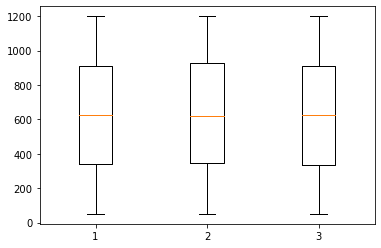

In [4]:
low = []
middle = []
high = []
for (index, row) in df.iterrows():
    if (3 >= row["calculated_host_listings_count"]): #for each category add them into the 3 lists
        low.append(row["price"])
    elif (6 >= row["calculated_host_listings_count"]):
        middle.append(row["price"])
    elif (6 < row["calculated_host_listings_count"]):
        high.append(row["price"])

# Graph boxplots.
plt.boxplot([low, middle, high]) #graph simple box plot


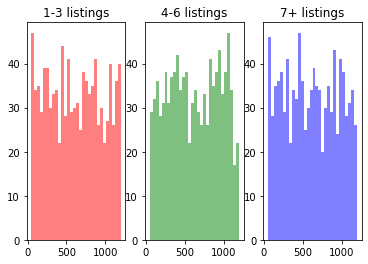

Low: 338.6783321545682
Middle: 325.5364498424101
High: 332.078373128995
Ratio of highest to lowest standard deviation: 1.0198747029605852


In [6]:

# Use numpy to randomly sample 1000 entries from the lists without replacement.
low_sample = np.array(low)[np.random.choice(len(low), size=1000, replace=False)]
middle_sample = np.array(middle)[np.random.choice(len(middle), size=1000, replace=False)]
high_sample = np.array(high)[np.random.choice(len(high), size=1000, replace=False)]

# Plot histograms to view distribution for first ANOVA condition of approximately normal distributions.
fig, axes = plt.subplots(1, 3)
axes[0].hist(low_sample, 30, alpha = 0.5, color = 'r')
axes[0].set_title("1-3 listings")
axes[1].hist(middle_sample, 30, alpha = 0.5, color = 'g')
axes[1].set_title("4-6 listings")
axes[2].hist(high_sample, 30, alpha = 0.5, color = 'b')
axes[2].set_title("7+ listings")
plt.show()

# Calculate ratio of standard deviations for second ANOVA condition of <2:1 ratio.
print("Low: " + str(np.std(low_sample)))
print("Middle: " + str(np.std(middle_sample)))
print("High: " + str(np.std(high_sample)))

print("Ratio of highest to lowest standard deviation: " + str(np.std(low_sample) / np.std(high_sample))) #specifically chose two, but can change if std varies for the 3rd case.

In [7]:
fvalue, pvalue = stats.f_oneway(low_sample, middle_sample, high_sample) #oneway test
print(fvalue, pvalue)

0.4265749664529397 0.6527805556471755


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
ridge = Ridge()
#tested cross validation and linear regression. Tried different things, but ended up with bad scores for regression.
y = df["calculated_host_listings_count"]
y = y.values.reshape(-1,1)
X = df["price"]
X = X.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
cv_results = cross_validate(ridge, X_train, y_train, cv=3)
cv_results

{'fit_time': array([0.00099754, 0.00299191, 0.00199556]),
 'score_time': array([0.00099802, 0.00099754, 0.00102973]),
 'test_score': array([-4.61799135e-04, -1.82358877e-05, -2.45820908e-04])}

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #tried kmeans clustering, did not get a great silhouette score either.
model = KMeans(n_clusters=3)
y = model.fit(X).predict(X)
silhouette_score(X, y, metric='euclidean')

NameError: name 'X' is not defined

In [51]:
from sklearn.neighbors import KNeighborsClassifier #did knn and ended with 61% accuracy as well.
knn=KNeighborsClassifier(n_neighbors = 11)
cv_results = cross_validate(knn, X_train, y_train, cv=3)
cv_results

C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'fit_time': array([0.02795887, 0.02393746, 0.02500367]),
 'score_time': array([0.55647707, 0.58539891, 0.57838464]),
 'test_score': array([0.61126452, 0.61308015, 0.61141582])}